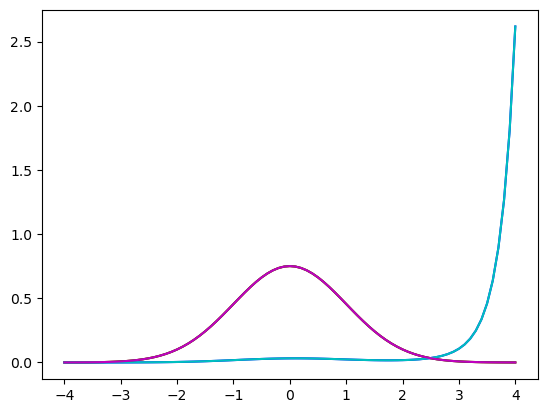

[0.999999976777123, 0.9999999767771286, 0.9999999767771341]


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

L = 4
tol = 1e-6   
col = ['r', 'b', 'g', 'c', 'm', 'k']  # Colors for eigenfunctions

def shoot(y, x, E):
    return [y[1], (x**2 - E) * y[0]]

x = np.arange(-L, L + 0.1, 0.1)  # Simulate from -L to L

eigenvalues = []
eigenfunctions = []

E_start = .1  # Initial guess for the eigenvalue

for modes in range(1, 6):
    E = E_start
    dE = E_start / 100  
    for _ in range(1000):   
        # Set initial conditions for the current guess of E
        y0 = [1, np.sqrt(L ** 2 - E)]
        ys = odeint(shoot, y0, x, args=(E,))
        
        # Check convergence at the right boundary (expecting decay)
        if abs(ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0] - 0) < tol:
            eigenvalues.append(E)
            eigenfunctions.append(ys[:, 0])  # Save the eigenfunction
            break
        
        # Update eigenvalue guess based on the shooting method
        if (-1) ** (modes + 1) * (ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0]) > 0:
            E += dE        
        else:
            E -= dE / 2  
            dE /= 2  

    
    E_start = E - 0.1
    norm = np.trapz(ys[:, 0] * ys[:, 0], x)  # Normalize the eigenfunction
    plt.plot(x, ys[:, 0] / np.sqrt(norm), col[modes - 1])  # Plot modes
plt.show()
print(eigenvalues)
